# A Keras Implementation of DogsVsCats

In [1]:
%matplotlib inline
from __future__ import print_function


import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from loader import load_dataset
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Data Paths

full = 'data/dogsvcats.hdf5'
X_train_orig, Y_train_orig, X_val_orig, Y_val_orig, X_test_orig, Y_test_orig = load_dataset(full)

#sample = 'data/dogsvcats-sample.hdf5'
#X_train_orig, Y_train_orig, X_val_orig, Y_val_orig, X_test_orig, Y_test_orig = load_dataset(sample)


y = 0


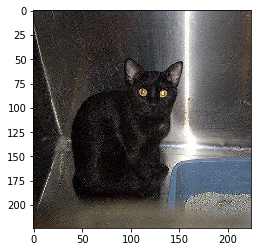

In [3]:
index = 7
plt.imshow(X_train_orig[index])
print("y = "+str(np.squeeze(Y_train_orig[:, index])))

y = 1


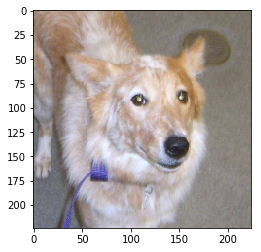

In [4]:
plt.imshow(X_val_orig[index])
print("y = "+str(np.squeeze(Y_val_orig[:,index])))

In [5]:
batch_size = 64
num_classes = 2
epochs = 1
img_rows, img_cols = 224, 224

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = X_train_orig.reshape(X_train_orig.shape[0], 3, img_rows, img_cols)
    x_val = X_val_orig.reshape(X_val_orig.shape[0], 3, img_rows, img_cols)
    x_test = X_test_orig.reshape(X_test_orig.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = X_train_orig.reshape(X_train_orig.shape[0], img_rows, img_cols, 3)
    x_val = X_val_orig.reshape(X_val_orig.shape[0], img_rows, img_cols, 3)
    x_test = X_test_orig.reshape(X_test_orig.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [7]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (15000, 224, 224, 3)
15000 train samples
5000 validation samples
5000 test samples


In [8]:
y_train = keras.utils.to_categorical(np.squeeze(Y_train_orig), num_classes)
y_val = keras.utils.to_categorical(np.squeeze(Y_val_orig), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(Y_test_orig), num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 199s 13ms/step - loss: 0.9291 - acc: 0.5531 - val_loss: 0.6359 - val_acc: 0.6518
Test loss:  0.639908876038
Test accuracy:  0.6354
